In [ ]:
%config InlineBackend.figure_format = 'retina'

# Pandas Tutorial


Weiterführende Dokumentation:

* [Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
* [Dreiteiliges Tutorial von Greg Reda](http://gregreda.com/2013/10/26/intro-to-pandas-data-structures/)
* [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)
* [Offizielle Pandas Dokumentation](http://pandas.pydata.org/pandas-docs/stable/)
* [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do)

Für Fortgeschrittene:

* [Modern Pandas](https://tomaugspurger.github.io/modern-1-intro)

In [ ]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt

pd.options.display.max_columns = 50
%matplotlib inline

# Series

Series sind eindimensionale Objekte wie Listen, Numpy Arrays oder Tabellenspalten. Jede Series hat einen Index, über den Elemente gefunden werden können. Defaultmässig ist das ein Integer von 0 bis n-1.

In [ ]:
values = [3, "foo", 3.14, 42, -23, "bar"]

In [ ]:
s = pd.Series(values)

In [ ]:
print(s)

0       3
1     foo
2    3.14
3      42
4     -23
5     bar
dtype: object


In [ ]:
s[3]

42

In [ ]:
index = ["a", "b", "c", "d", "e", "f"]

In [ ]:
s = pd.Series(values, index=index)

In [ ]:
s

a       3
b     foo
c    3.14
d      42
e     -23
f     bar
dtype: object

In [ ]:
s["d"]

42

In [ ]:
s[["a", "b", "c"]]

a       3
b     foo
c    3.14
dtype: object

In [ ]:
s = pd.Series(np.arange(10), index=np.arange(10, 20))
s[s > 5]

16    6
17    7
18    8
19    9
dtype: int64

# DataFrames

Sind zweidimensionale Datenstrukturen ähnlich wie Tabellen oder Excel-Sheets. Im Grunde eine Sammlung von Series.

In [ ]:
cities_url = "https://de.wikipedia.org/wiki/Liste_der_gr%C3%B6%C3%9Ften_St%C3%A4dte_Europas"
tables = pd.read_html(cities_url, header=0, flavor="bs4")

In [ ]:
df = tables[0]

In [ ]:
df.head()

,Unnamed: 0,Name,Staat,Ein­wohner,Stand,Quelle,Panorama
0,1,Istanbul,Türkei[1],15.907.951 [2],31. Dez. 2022,TÜİK[3],NaN
1,2,Moskau,Russland[1],12.455.682,1. Jan. 2021,Rosstat[4],NaN
2,3,London,Vereinigtes Königreich,8.799.900,21. März 2021,ONS[5],NaN
3,4,Sankt Petersburg,Russland,5.384.342,1. Jan. 2021,Rosstat[4],NaN
4,5,Berlin,Deutschland,3.755.251,31. Dez. 2022,AfS[6],NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  103 non-null    int64 
 1   Name        103 non-null    object
 2   Staat       103 non-null    object
 3   Ein­wohner  103 non-null    object
 4   Stand       103 non-null    object
 5   Quelle      103 non-null    object
 6   Panorama    1 non-null      object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


In [ ]:
df.memory_usage(deep=True)

Index          132
Unnamed: 0     824
Name          6857
Staat         7128
Ein­wohner    6664
Stand         9617
Quelle        6821
Panorama      3323
dtype: int64

## Method Chaining

In [ ]:
def time_to_datetime(df, colname):
    def reformat_date(date_str):
        return (date_str.replace("\xa0", "")
                        .replace("Okt", "Oct")
                        .replace("Dez", "Dec")
                        .replace("i2", ".2")
                        .strip()
                        .replace(" ", ""))
    
    df[colname] = pd.to_datetime(df[colname].apply(reformat_date), format="%d.%b.%Y")
    return df

In [ ]:
df = (df.rename(columns=str.lower)
        .pipe(time_to_datetime, "stand")
        .assign(staat=lambda x: pd.Categorical(x['staat']),
                einwohner=lambda x: x["einwohner"].str.replace(".", "").astype(np.int32),
                rang=lambda x: x["rang"].astype(np.int8),
                pro_km2=lambda x: x["panorama"].str.extract("(\d+\.\d+) E[a-z]*./km").astype(np.float32))
        .drop("quelle", axis=1)
        .drop("panorama", axis=1))

ValueError: time data "21.März2021" doesn't match format "%d.%b.%Y", at position 2. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
rang         101 non-null int8
name         101 non-null object
einwohner    101 non-null int32
stand        101 non-null datetime64[ns]
staat        101 non-null category
pro_km2      43 non-null float32
dtypes: category(1), datetime64[ns](1), float32(1), int32(1), int8(1), object(1)
memory usage: 4.1+ KB


In [ ]:
df.head()

,rang,name,einwohner,stand,staat,pro_km2
0,1,Istanbul,14804116,2017-01-31,Türkei,2.767
1,2,Moskau,12228685,2017-07-01,Russland,4.802
2,3,London,8825001,2017-06-30,Vereinigtes Königreich,2.925
3,4,Sankt Petersburg,5281579,2017-07-01,Russland,3.628
4,5,Berlin,3611222,2017-11-30,Deutschland,3.829


In [ ]:
df.sort_values(by="pro_km2", ascending=False).head()

,rang,name,einwohner,stand,staat,pro_km2
8,9,Paris,2206488,2015-01-01,Frankreich,21.153999
56,57,Athen,664046,2011-04-09,Griechenland,17.042999
15,16,Barcelona,1620809,2017-01-01,Spanien,16.045000
12,13,Bukarest,1826506,2017-01-01,Rumänien,8.261000
34,35,Neapel,966646,2017-10-31,Italien,8.178000


## Indices

### Einfach

In [ ]:
ds = df.set_index("rang")

In [ ]:
ds.loc[2:5, "einwohner": "staat"].head()

,einwohner,stand,staat
rang,,,
2,12228685,2017-07-01,Russland
3,8825001,2017-06-30,Vereinigtes Königreich
4,5281579,2017-07-01,Russland
5,3611222,2017-11-30,Deutschland


In [ ]:
ds.loc[ds.name.isin(("Paris", "Bukarest")), "einwohner": "staat"].head()

,einwohner,stand,staat
rang,,,
9,2206488,2015-01-01,Frankreich
13,1826506,2017-01-01,Rumänien


### Mehrdimensional

In [ ]:
df.head()

,rang,name,einwohner,stand,staat,pro_km2
0,1,Istanbul,14804116,2017-01-31,Türkei,2.767
1,2,Moskau,12228685,2017-07-01,Russland,4.802
2,3,London,8825001,2017-06-30,Vereinigtes Königreich,2.925
3,4,Sankt Petersburg,5281579,2017-07-01,Russland,3.628
4,5,Berlin,3611222,2017-11-30,Deutschland,3.829


In [ ]:
ds = df.set_index(["staat", "stand", "rang"]).sort_index()

In [ ]:
ds.loc["Deutschland",:,:]

name  einwohner  pro_km2
staat       stand      rang                                       
Deutschland 2016-12-31 77               Bremen     565719    1.738
            2017-06-30 29                 Köln    1077611    2.619
                       67           Düsseldorf     614839    2.816
                       71             Dortmund     585535    2.088
                       72                Essen     582659    2.770
            2017-09-30 17              München    1457576    4.743
                       48    Frankfurt am Main     745136    2.894
                       64            Stuttgart     631015    2.914
                       74              Leipzig     578004    1.831
                       82              Dresden     548834    1.634
                       90             Hannover     532825    2.610
                       96             Nürnberg     514473    2.725
            2017-11-30 5                Berlin    3611222    3.829
                       12              Hamburg    1830669    2.335

In [ ]:
ds.loc["Deutschland", "2017-09-30":"2017-11-30", [5, 90, 96]]

name  einwohner  pro_km2
staat       stand      rang                              
Deutschland 2017-09-30 90    Hannover     532825    2.610
                       96    Nürnberg     514473    2.725
            2017-11-30 5       Berlin    3611222    3.829

## Einfache Plots

In [ ]:
size = (10, 5)

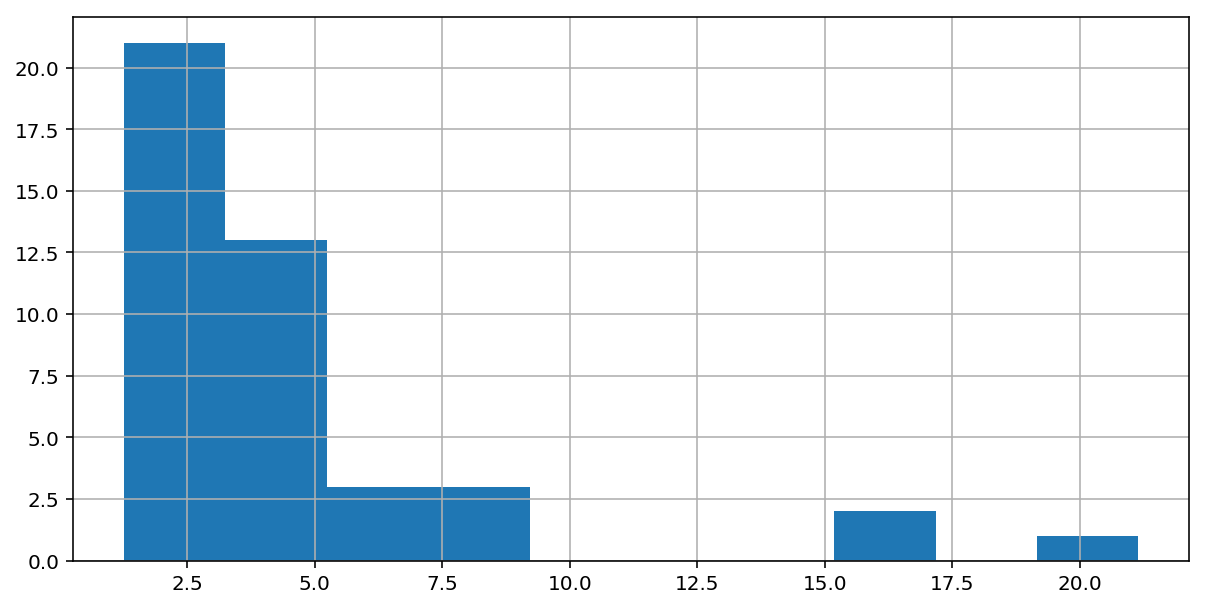

In [ ]:
ax = df.pro_km2.hist(figsize=size)

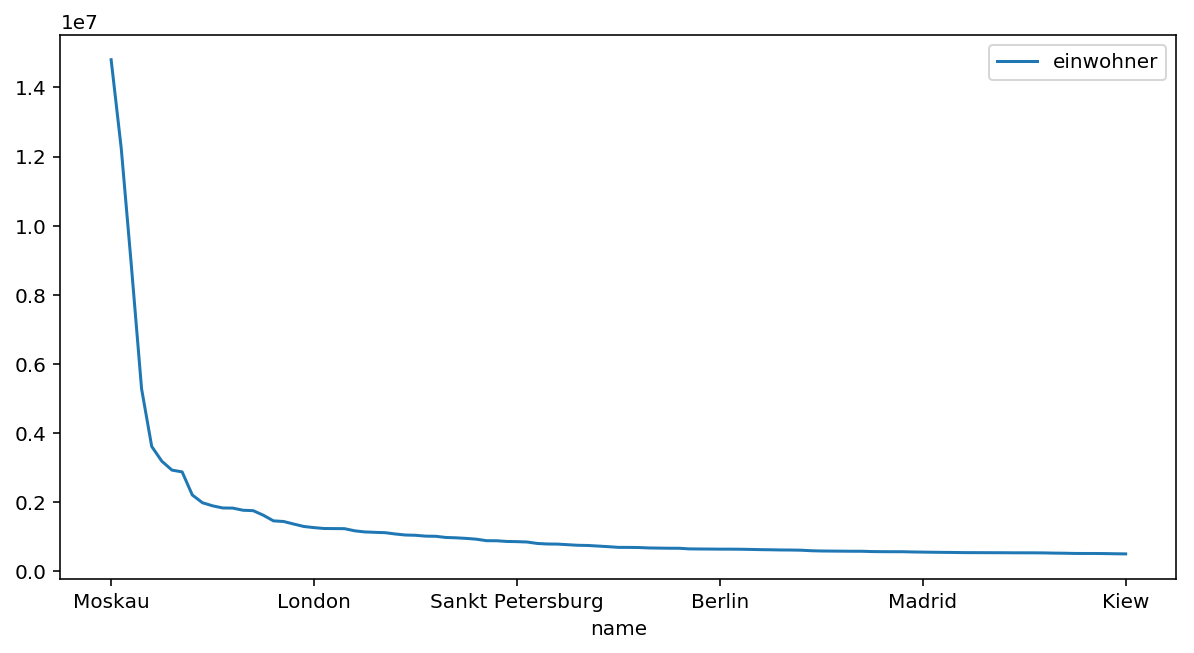

In [ ]:
ax = df.plot(x="name", y="einwohner", figsize=size)
_ = ax.set_xticklabels(df.name)

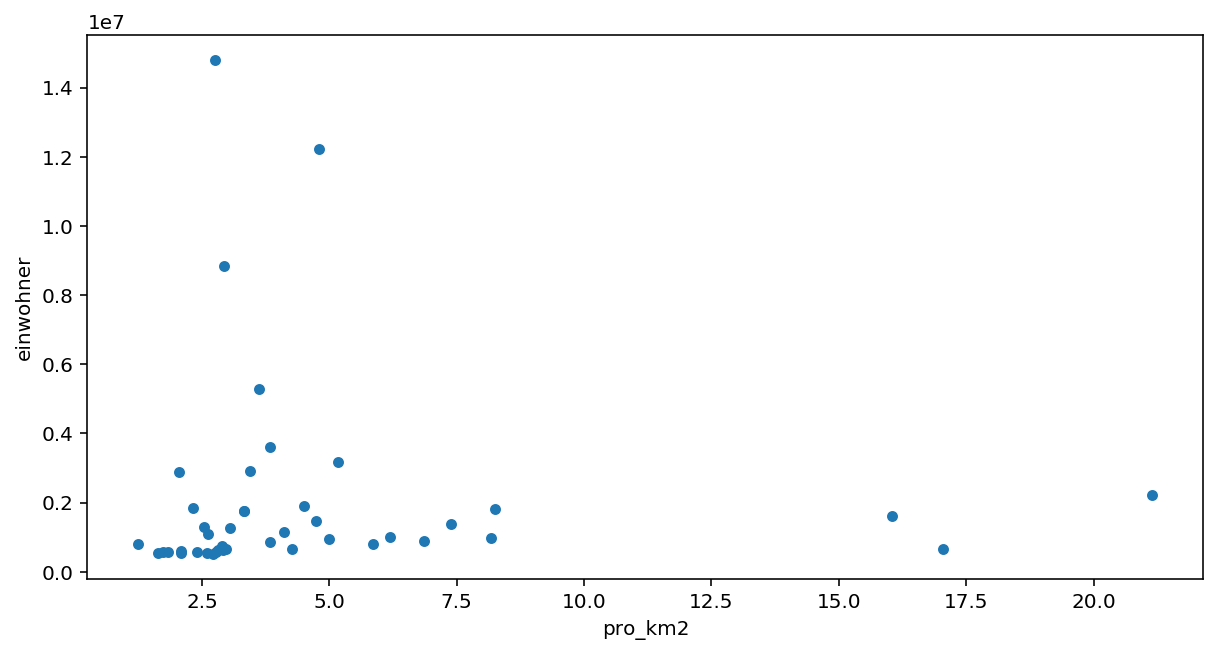

In [ ]:
ax = df.plot.scatter(x="pro_km2", y="einwohner", figsize=size)

## Gruppieren

In [ ]:
dt = (df[["staat", "einwohner", "name"]]
      .groupby("staat")
      .agg({"einwohner": "sum", "name": "count"})
      .rename(columns={"name": "städte"})
      .reset_index()
      .sort_values(by="städte", ascending=False)
      .head(12))
dt

,staat,einwohner,städte
20,Russland,35126970,24
3,Deutschland,13876117,14
28,Vereinigtes Königreich,13539290,8
26,Ukraine,9394252,8
9,Italien,7339318,6
23,Spanien,7514972,6
17,Polen,4399604,5
15,Niederlande,2026582,3
6,Frankreich,3581398,3
21,Schweden,1513800,2


## Wie oft kommen welche Werte in einer Spalte vor?

In [ ]:
dt.städte.value_counts()

8     2
6     2
3     2
2     2
14    1
24    1
5     1
1     1
Name: städte, dtype: int64

## Mal die Einwohner pro Land holen

In [ ]:
countries_url = "https://de.wikipedia.org/wiki/Liste_von_Staaten_und_Territorien_nach_Bev%C3%B6lkerungsentwicklung"
tables = pd.read_html(countries_url, header=0, flavor="bs4", decimal=",", thousands=".")

In [ ]:
dc = tables[0]
num_cols = ["1950", "2016", "2050", "2100"]
columns = ["staat"] + num_cols + ["ftr2016"]
dc.columns = columns
dc[num_cols] = (dc[num_cols] * 1000000).astype(np.int64)  # just wow
dc["staat"] = pd.Categorical(dc.staat)
dc["ftr2016"] = dc.ftr2016.str.replace("k.*", "nan", regex=True).astype(np.float32)

In [ ]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 6 columns):
staat      208 non-null category
1950       208 non-null int64
2016       208 non-null int64
2050       208 non-null int64
2100       208 non-null int64
ftr2016    206 non-null float32
dtypes: category(1), float32(1), int64(4)
memory usage: 19.4 KB


In [ ]:
dc.head()

,staat,1950,2016,2050,2100,ftr2016
0,Volksrepublik China,543700000,1382300000,1348000000,1004400000,1.5
1,Indien,376400000,1326800000,1659000000,1516600000,2.3
2,Vereinigte Staaten,157800000,324100000,389600000,447500000,1.8
3,Indonesien,72500000,260500000,321500000,306000000,2.3
4,Brasilien,53900000,209500000,232700000,190400000,1.8


### query

In [ ]:
dc.query("ftr2016 > 2 and staat in ('Niger', 'Somalia', 'Brasilien')")

,staat,1950,2016,2050,2100,ftr2016
57,Niger,2500000,20700000,68500000,192200000,7.6
73,Somalia,2200000,14300000,35000000,79000000,6.4


## Join - wie in SQL

In [ ]:
dm = (pd.merge(dt, dc, on="staat")[["staat", "städte", "einwohner", "2016"]]
        .rename(columns={"einwohner": "in_städten", "2016": "gesamt"}))
dm

,staat,städte,in_städten,gesamt
0,Russland,24,35126970,143400000
1,Deutschland,14,13876117,82300000
2,Vereinigtes Königreich,8,13539290,65099999
3,Ukraine,8,9394252,44600000
4,Italien,6,7339318,59800000
5,Spanien,6,7514972,46000000
6,Polen,5,4399604,38600000
7,Niederlande,3,2026582,16900000
8,Frankreich,3,3581398,66800000
9,Schweden,2,1513800,9800000


In [ ]:
dm["stadt_quote"] = dm.in_städten / dm.gesamt

In [ ]:
dm

,staat,städte,in_städten,gesamt,stadt_quote
0,Russland,24,35126970,143400000,0.244958
1,Deutschland,14,13876117,82300000,0.168604
2,Vereinigtes Königreich,8,13539290,65099999,0.207977
3,Ukraine,8,9394252,44600000,0.210633
4,Italien,6,7339318,59800000,0.122731
5,Spanien,6,7514972,46000000,0.163369
6,Polen,5,4399604,38600000,0.113979
7,Niederlande,3,2026582,16900000,0.119916
8,Frankreich,3,3581398,66800000,0.053614
9,Schweden,2,1513800,9800000,0.154469


# Oft genutzte Operationen

In [ ]:
df = pd.DataFrame(index=["A", "B", "C"])
df["name"] = ["foo", "bar", "baz"]
df["value"] = [23, 42, 28]

In [ ]:
df

,name,value
A,foo,23
B,bar,42
C,baz,28


In [ ]:
df.reset_index()

,index,name,value
0,A,foo,23
1,B,bar,42
2,C,baz,28


In [ ]:
dm = df.reset_index().melt(id_vars=['index'])
dm

,index,variable,value
0,A,name,foo
1,B,name,bar
2,C,name,baz
3,A,value,23
4,B,value,42
5,C,value,28


In [ ]:
dm.pivot(columns="variable", values="value", index="index")

variable,name,value
index,,
A,foo,23
B,bar,42
C,baz,28
